In [88]:
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Deep Learning modules
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.layers import Input

#### **Data Load**

In [60]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


##### **Data Explore**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
df.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

##### **Class Distribution Check**

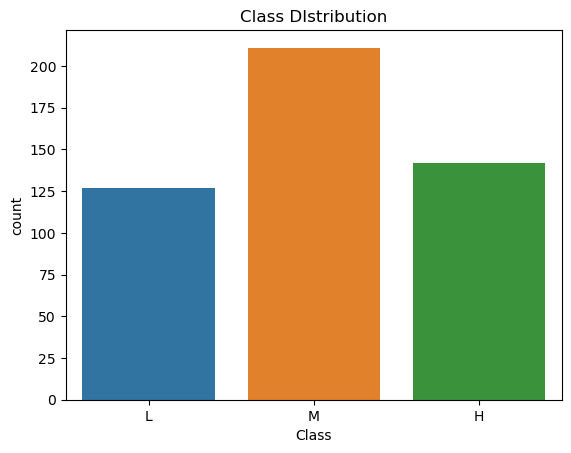

In [10]:
sns.countplot(x="Class", data=df, order =["L","M","H"])
plt.title("Class DIstribution")
plt.show()

##### -> M(중간등급) 학생이 가장 많음

#### **Feature Correlation (특성 간 상관관계 확인)**

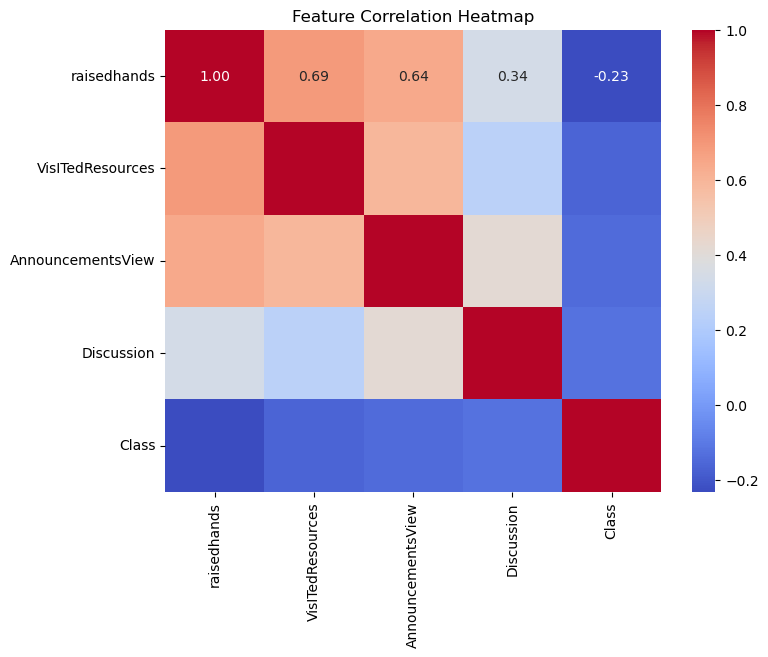

In [ ]:
num_features = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
df_corr = df[num_features + ["Class"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### **Main Feature Visualization - high relation with feature research**


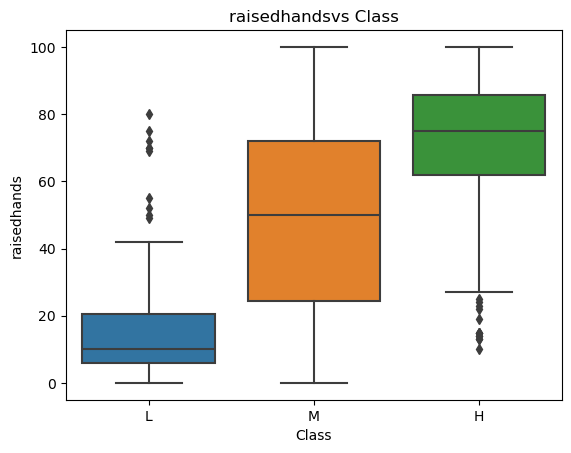

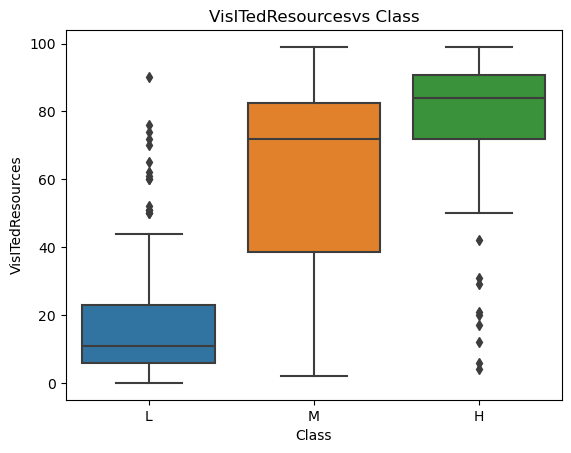

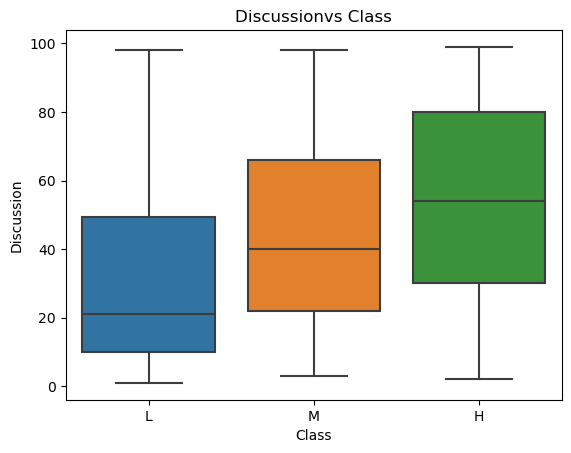

In [11]:
features = ["raisedhands", "VisITedResources","Discussion"]
for feature in features:5
    sns.boxplot(x="Class", y=feature, data=df, order=["L","M","H"])
    plt.title(f"{feature}vs Class")
    plt.show()

#### 1. Raised Hands vs Class
L(낮음) 성적을 받는 학생들은 손을 드는 횟수가 낮음 
H(높음) 성적을 받은 학생들은 손을 드는 횟수가 많음.

-> 전체적인 그래프를 확인해봤을떄, **손을 많이드는 학생일수록 성적이 높을 가능성이 큼**

#### 2. Visited Resources vs Class 
L(낮음) 학생들은 학습 자료를 거의 확인하지 않음.
H(높음) 학생들은 학습 자료를 많이 확인함.

→ **학습 자료를 많이 활용할수록 성적이 좋아질 가능성이 큼.**

#### 3. Discussion vs Class 

L(낮음) 학생들은 토론 참여 횟수가 적음.
M(보통) 학생들은 중간 수준의 참여.
H(높음) 학생들은 토론 참여가 많음.

→ **토론 참여도 성적에 영향을 줄 가능성이 있음.**

### **Categorical Features Encoding (Label encoding)**

In [14]:
encoder = LabelEncoder()
for col in ["gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID", "SectionID", "Topic", "Semester", 
            "Relation", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "StudentAbsenceDays", "Class"]:
    df[col] = encoder.fit_transform(df[col])

### **Model Preparation**

In [39]:
# train test split 
X = df.drop("Class", axis = 1 )
y =  df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42, stratify=y)

In [35]:
print("feature 확인:" , X_train.head()) 

feature 확인:      gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
425       0            3             3        1        5          0      5   
37        0            0             0        1        4          0      7   
44        0            4             4        0        6          0      7   
53        0            4             4        0        8          0     10   
251       1            0             0        2        1          0      3   

     Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
425         1         1           84                77                 79   
37          0         0           45                54                 26   
44          0         0           33                33                 30   
53          0         1           49                70                 19   
251         1         1           19                74                 32   

     Discussion  ParentAnsweringSurvey  ParentschoolSati

In [22]:
#Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Train**

In [23]:
# LR model training 
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [24]:
# XGB model training 
xgb = XGBClassifier(eval_metric = "mlogloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

### **Eval**

In [26]:
# Evaluation Metrics check (at once)
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Logistic Regression Model Evaluation:
Accuracy: 0.7396
Precision: 0.7410
Recall: 0.7396
F1 Score: 0.7376

XGBoost Model Evaluation:
Accuracy: 0.7812
Precision: 0.7829
Recall: 0.7812
F1 Score: 0.7793



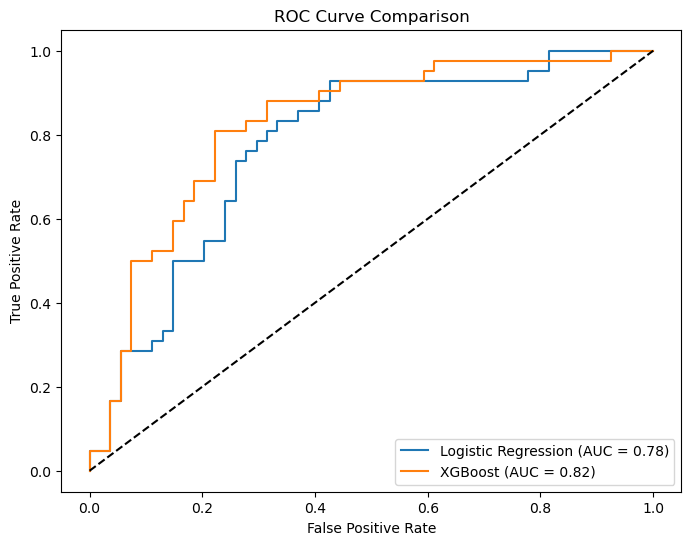

In [31]:
# ROC Curve check 
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob, pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, lr.predict_proba(X_test)[:, 2], "Logistic Regression")
plot_roc_curve(y_test, xgb.predict_proba(X_test)[:, 2], "XGBoost")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

#### **LR  AUC = 0.78 |   XGB AUC = 0.82**
##### XGB model 이 LR model 보다 분류 성능이 좋음 
##### AUC가 0.5이상이므로 두 모델 모두 예측력 잇으나 **XGB가 최종 성적 분류에 더 적합**하다고 할수있음

## **DL Implementation**

#### **Categorical feature One-Hot Encoding**

In [61]:
categorical_features = ["gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID", "SectionID",
                        "Topic", "Semester", "Relation", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "StudentAbsenceDays"]
df = pd.get_dummies(df, columns=categorical_features)

In [62]:
# 정규화
scaler = MinMaxScaler()
num_features = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
df[num_features] = scaler.fit_transform(df[num_features])

In [72]:
# one hot encoding in Target features(Class)

encoder = OneHotEncoder(sparse_output=False)
class_labels = df["Class"].values.reshape(-1, 1)
y = encoder.fit_transform(class_labels) 

In [76]:
X = df.drop(columns=["Class"]).astype(np.float32).values 
y = y.astype(np.float32) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print(X_train.dtype, y_train.dtype)  

float32 float32


### **Modeling**

In [85]:
# MLP구조
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # input()
    Dense(64, activation="relu"), # hidden layer (64, Relu)
    Dropout(0.3), 
    Dense(32, activation="relu"),   # hidden layer(32, Relu)
    Dropout(0.3),
    Dense(3, activation="softmax")  # 출력층 (3 classes, softmax)
])

In [86]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4123 - loss: 1.0793 - val_accuracy: 0.5833 - val_loss: 0.9476
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 0.9883 - val_accuracy: 0.6458 - val_loss: 0.8641
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5475 - loss: 0.8995 - val_accuracy: 0.7188 - val_loss: 0.7748
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.8313 - val_accuracy: 0.7500 - val_loss: 0.6908
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6494 - loss: 0.7590 - val_accuracy: 0.8021 - val_loss: 0.6343
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.7141 - val_accuracy: 0.7708 - val_loss: 0.5871
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.7359 - val_accuracy: 0.8021 - val_loss: 0.5735
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 0.6254 - val_accuracy: 0.8021 - val_loss: 0.5

In [87]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8021 - loss: 0.5494 
Test Accuracy: 0.8229


MLP모델 선정이유: 해당 데이터는 학업 성취도를 예츩하는 데이터로서 Tabular데이터. 

테이블 형식에는 MLP 
일단 데이터가 많지 않기때문에 과적합 여부를 확인하고 모델을 튜닝하는 것이 중요함 

#### **Total Results**

#### **>> LR (73.95) < XGB(78.12) < MLP ( 82.29)**
딥러닝 모델이 기존 머신러닝 모델(두가지)보다 좋은 예측 성능을 보임